# Intro to Scikit Learn
Using the package sklearn for linear and logistic regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Reminder about Shape

There was some confusion in homework about shape. So let's review a little before using it.

In [2]:
## What shape does this have? Why?
Pi=np.array([3,1,4,1,5,9])
Pi

array([3, 1, 4, 1, 5, 9])

In [3]:
Pi.shape

(6,)

In [4]:
## Can we do matrix manipulation with Pi?
Pi.T

array([3, 1, 4, 1, 5, 9])

In [5]:
Pix=Pi.reshape(-1,1)
Pix.shape

(6, 1)

In [6]:
Pix

array([[3],
       [1],
       [4],
       [1],
       [5],
       [9]])

In [7]:
## Can we multiply Pix * Pi?
#np.matmul(Pix,Pi)

In [8]:
Pix.T

array([[3, 1, 4, 1, 5, 9]])

In [9]:
Piy=Pix.T
Piy.shape

(1, 6)

In [10]:
## How is Piy different from Pi?
## How is it related to Pi?
print(Piy)
print(Pi)

[[3 1 4 1 5 9]]
[3 1 4 1 5 9]


In [11]:
print("Pi[0]:",Pi[0])
print("Piy[0]:",Piy[0])

Pi[0]: 3
Piy[0]: [3 1 4 1 5 9]


In [12]:
Piy[0].shape

(6,)

In [13]:
Pi.shape

(6,)

In [14]:
Pix.shape

(6, 1)

In [15]:
## We know how to turn (6,) into (6,1) or (1,6) using reshape.
## How do we turn (6,1) or (1,6) into (6,)??
## Can use .ravel for flattening an array.
Piz=Pix.ravel()  
Piz.shape

(6,)

In [16]:
Piz

array([3, 1, 4, 1, 5, 9])

In [17]:
print(Pix.T)
Pit=Pix.T.ravel()
print(Pit)
Pit.shape

[[3 1 4 1 5 9]]
[3 1 4 1 5 9]


(6,)

In [18]:
Pit

array([3, 1, 4, 1, 5, 9])

In [19]:
mm=np.array([[1,2],[3,4]])

In [20]:
mm.shape

(2, 2)

In [21]:
mm.ravel()

array([1, 2, 3, 4])

In [22]:
## How does this connect to dataframes?
## Which is best way to convert dataframe to numpy array?
purchase_1 = pd.Series({'Name': 'Bongo',
                        'Item Purchased': 'Noise Maker',
                        'Cost': 22.00})
purchase_2 = pd.Series({'Name': 'Bella',
                        'Item Purchased': 'Tuna Treats',
                        'Cost': 11.50})
purchase_3 = pd.Series({'Name': 'Kika',
                        'Item Purchased': 'Escape Kit',
                        'Cost': 15.00})
df = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 1', 'Store 2'])
df


,Name,Item Purchased,Cost
Store 1,Bongo,Noise Maker,22.0
Store 1,Bella,Tuna Treats,11.5
Store 2,Kika,Escape Kit,15.0


In [23]:
## Option 1
df.values
## Option 2
df.to_numpy()
## Option 3
np.array(df)

array([['Bongo', 'Noise Maker', 22.0],
       ['Bella', 'Tuna Treats', 11.5],
       ['Kika', 'Escape Kit', 15.0]], dtype=object)

Answer:
    
   Option ???
   

Option 1 is older, occasionally unstable and will eventually be depreciated

Option 2 is new for pandas v24 and is now recommended method.

Option 3 is also sometimes unstable. 

pd.show_versions()  if you want to see which version of pandas

In [24]:
#pd.show_versions() 

In [25]:
print("shape=",df.shape)
dfnp=df.values
#dfnp=df.to_numpy()
print(dfnp)

shape= (3, 3)
[['Bongo' 'Noise Maker' 22.0]
 ['Bella' 'Tuna Treats' 11.5]
 ['Kika' 'Escape Kit' 15.0]]


In [26]:
## Note that for a single column you do not get a matrix.
df['Cost'].shape

(3,)

In [27]:
print(type(df['Cost']))
dfnp=df['Cost'].to_numpy()
#dfnp=df['Cost'].values
print(type(dfnp))
print(dfnp)
dfnp.shape

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[22.  11.5 15. ]


(3,)

In [28]:
## Quick tip: Note the double brackets
df[['Cost']].shape

(3, 1)

In [29]:
print(type(df[['Cost']]))
dfnp=df[['Cost']].to_numpy()
#dfnp=df[['Cost']].values
print(type(dfnp))
print(dfnp)
dfnp.shape

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[[22. ]
 [11.5]
 [15. ]]


(3, 1)

## Linear Regression Example with Sklearn

In [30]:
## From HW due Jan 27
# Use Pandas to read in the data, label the first column "Population" and the second column "Profit"
# Display that first few rows of the data.
URL = 'http://facweb1.redlands.edu/fac/joanna_bieri/machinelearning/ex1data1.txt'

df = pd.read_csv(URL, header=None)
df.columns=["Population","Profit"]
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [31]:
## Use sklearn package to do Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()  ## just a shortcut to type less
X=df[["Population"]]  ##Note the double brackets [[]] makes X a DataFrame 
## instead of Series, fixes shape to (97,1)
print(X.shape)
print(type(X))
Y=df["Profit"]  ## Y is still a Series, note shape.
#Y=df[['Profit']]
print(Y.shape)
print(type(Y))
lm.fit(X,Y)  ## The .fit command performs the linear regression 

(97, 1)
<class 'pandas.core.frame.DataFrame'>
(97,)
<class 'pandas.core.series.Series'>


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Notes:
<ul>
    <li>
the LinearRegression function added the ones to $X$
    </li><li>
performed gradient descent 
</li><li>
LinearRegression does not do any automatic normalizing/scaling of data. 
</li><li> Should we normalize/scale this data set? 
</li>
    </ul>
    
To use LinearRegression function:
<ul>
    <li> Enter $X$ and $Y$
        </li><li>X is data, for $f$ features and $m$ data points, $X$ should have shape$(m,f)$
</li><li> Y is label, can have shape$(m,)$ or shape$(m,1)$ but shape$(m,)$ will output a little nicer
</li><li> Do not have to convert from dataframe to numpy array.
    </li><li> See lm? for other parameters.
    </li>
    </ul>

In [32]:
lm?

In [33]:
## This is theta_0
lm.intercept_

-3.89578087831185

In [34]:
## This is an array of theta_1, ... theta_f  for f features
lm.coef_

array([1.19303364])

In [35]:
params=[lm.intercept_,lm.coef_[0]]
params

[-3.89578087831185, 1.1930336441895935]

NOTE: If shape of Y is $(m,1)$ then these will come inside an additional array:

lm.intercept=array([-3.8957808783118537])

lm_coef_=array([[1.19303364]])

No big deal, but you should be careful about getting an array versus a number.

(0, 26.25)

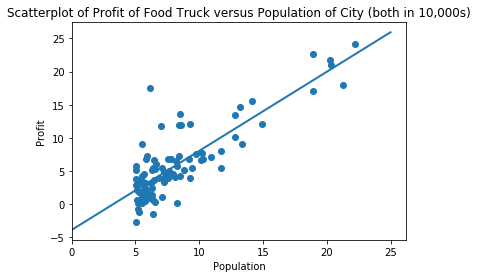

In [36]:
## producing scatterplot and linear regression line
plt.scatter(X,Y)
plt.title("Scatterplot of Profit of Food Truck versus Population of City (both in 10,000s)")
plt.xlabel("Population")
plt.ylabel("Profit")
## to graph the regression line
t = np.linspace(0.0, 25.0, 100)
s =[params[1]*t1+params[0] for t1 in t]
plt.plot(t, s, lw=2)
## Specify the values on the axes (x or y)
plt.xlim(0,)

In [37]:
## predicting values with the regression line
## Use .predict command
lm.predict([[11.2],[1.8]])

array([ 9.46619594, -1.74832032])

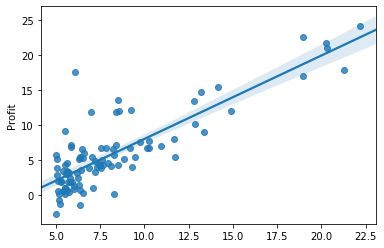

In [38]:
##using seaborn package to do regression and scatterplot in one
import seaborn as sns
##currently giving an error/warning. appears to be an error in how seaborn package 
##is using the scipy stats package. Not an error that I know how to fix. 
sns.regplot(x=df[["Population"]],y=df["Profit"])
plt.show()

Object `benchmark` not found.
